In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!ls /content/gdrive/My\ Drive/eva-04/S9/* 

In [0]:
!cat '/content/gdrive/My Drive/eva-04/S9/transformations/CIFARModel10_Alb.py'

In [0]:
!cat '/content/gdrive/My Drive/eva-04/S9/gradcam/gradcam_utils.py'

We'll need to update our path to import from Drive.

In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/eva-04/S9/')

Now we can import the library and use the function.

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from albumentations import Compose, RandomCrop, Normalize, HorizontalFlip, Resize
from albumentations.pytorch import ToTensor

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
cuda
CUDA Available? True


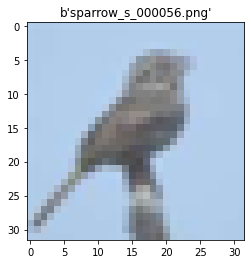

In [0]:
from models import Resnet18 as resnet18
from transformations import CIFARModel10_Alb as cifar

import importlib
importlib.reload(resnet18)
importlib.reload(cifar)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = resnet18.ResNet18().to(device)

SEED = 1
# CUDA?
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
#dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if use_cuda else dict(shuffle=True, batch_size=64)

# train dataloader
#train_loader = torch.utils.data.DataLoader(g_train, **dataloader_args)

# test dataloader
#test_loader = torch.utils.data.DataLoader(g_test, **dataloader_args)
import images as im
import random
X,Y,names = im.get_data('cifar-10-batches-py/data_batch_1')
import numpy as np
import matplotlib.pyplot as plt
import os
importlib.reload(im)
for x in range(100):
  im.visualize_image(X,Y,names,random.randint(1,10000),'/content/gdrive/My Drive/eva-04/S9/images')


SHOW PARAMETERS

RUNNING WITH REGULARIZATION

In [0]:
from utils.global_fun import test_model
from utils.global_fun import train_model
from utils.global_fun import show_summary, run_model,  draw_accuracy_loss_change_graps

from models import Resnet18 as resnet18
from transformations import CIFARModel10_Alb as cifar

import importlib
importlib.reload(resnet18)
importlib.reload(cifar)


cifar_model = cifar.CIFARModel10_Alb(model)
show_summary(cifar_model,input_size=(3,32,32))
run_model(cifar_model, device, doL1= 1, doL2=1, LAMBDA=0.0005, EPOCHS=150)

Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/196 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Loss=59.76564407348633 Batch_id=195 Accuracy=26.71: 100%|██████████| 196/196 [00:51<00:00,  3.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 3647/10000 (36.47%)

EPOCH: 1
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 1


Loss=59.62980651855469 Batch_id=195 Accuracy=36.00: 100%|██████████| 196/196 [00:52<00:00,  3.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 4272/10000 (42.72%)

EPOCH: 2
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 2


Loss=59.3602180480957 Batch_id=195 Accuracy=40.56: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0058, Accuracy: 4729/10000 (47.29%)

EPOCH: 3
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 3


Loss=59.29802322387695 Batch_id=195 Accuracy=44.01: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0056, Accuracy: 4956/10000 (49.56%)

EPOCH: 4
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 4


Loss=58.865596771240234 Batch_id=195 Accuracy=46.13: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5194/10000 (51.94%)

EPOCH: 5
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 5


Loss=59.19628143310547 Batch_id=195 Accuracy=47.84: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 5546/10000 (55.46%)

EPOCH: 6
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 6


Loss=58.910335540771484 Batch_id=195 Accuracy=49.75: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 5481/10000 (54.81%)

EPOCH: 7
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 7


Loss=58.98462677001953 Batch_id=195 Accuracy=51.37: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 5632/10000 (56.32%)

EPOCH: 8
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 8


Loss=58.71832275390625 Batch_id=195 Accuracy=52.51: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 5923/10000 (59.23%)

EPOCH: 9
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 9


Loss=58.5294303894043 Batch_id=195 Accuracy=53.92: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 6015/10000 (60.15%)

EPOCH: 10
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 10


Loss=58.60907745361328 Batch_id=195 Accuracy=55.13: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 6005/10000 (60.05%)

EPOCH: 11
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 11


Loss=58.44607925415039 Batch_id=195 Accuracy=56.46: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 6294/10000 (62.94%)

EPOCH: 12
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 12


Loss=58.65475082397461 Batch_id=195 Accuracy=56.91: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 6312/10000 (63.12%)

EPOCH: 13
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 13


Loss=58.359230041503906 Batch_id=195 Accuracy=58.34: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6435/10000 (64.35%)

EPOCH: 14
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 14


Loss=58.38801574707031 Batch_id=195 Accuracy=59.26: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6609/10000 (66.09%)

EPOCH: 15
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 15


Loss=58.2791748046875 Batch_id=195 Accuracy=59.93: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6500/10000 (65.00%)

EPOCH: 16
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 16


Loss=58.12192916870117 Batch_id=195 Accuracy=60.84: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 6240/10000 (62.40%)

EPOCH: 17
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 17


Loss=57.98125457763672 Batch_id=195 Accuracy=61.82: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 6947/10000 (69.47%)

EPOCH: 18
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 18


Loss=58.202457427978516 Batch_id=195 Accuracy=62.45: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0040, Accuracy: 6523/10000 (65.23%)

EPOCH: 19
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 19


Loss=58.032188415527344 Batch_id=195 Accuracy=63.27: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6884/10000 (68.84%)

EPOCH: 20
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 20


Loss=57.86058044433594 Batch_id=195 Accuracy=63.99: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6981/10000 (69.81%)

EPOCH: 21
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 21


Loss=57.746273040771484 Batch_id=195 Accuracy=64.38: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 6971/10000 (69.71%)

EPOCH: 22
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 22


Loss=57.63327407836914 Batch_id=195 Accuracy=65.24: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7218/10000 (72.18%)

EPOCH: 23
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 23


Loss=57.59397888183594 Batch_id=195 Accuracy=65.71: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6882/10000 (68.82%)

EPOCH: 24
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 24


Loss=57.8505973815918 Batch_id=195 Accuracy=66.04: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7299/10000 (72.99%)

EPOCH: 25
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 25


Loss=57.656314849853516 Batch_id=195 Accuracy=66.55: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7246/10000 (72.46%)

EPOCH: 26
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 26


Loss=57.58881378173828 Batch_id=195 Accuracy=67.38: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7410/10000 (74.10%)

EPOCH: 27
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 27


Loss=57.48124694824219 Batch_id=195 Accuracy=67.81: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7495/10000 (74.95%)

EPOCH: 28
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 28


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7354/10000 (73.54%)

EPOCH: 29
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 29


Loss=57.640968322753906 Batch_id=195 Accuracy=68.86: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7410/10000 (74.10%)

EPOCH: 30
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 30


Loss=57.256771087646484 Batch_id=195 Accuracy=69.19: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7443/10000 (74.43%)

EPOCH: 31
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 31


Loss=57.0307502746582 Batch_id=195 Accuracy=69.21: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7467/10000 (74.67%)

EPOCH: 32
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 32


Loss=57.26142883300781 Batch_id=195 Accuracy=69.98: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7576/10000 (75.76%)

EPOCH: 33
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 33


Loss=57.03809356689453 Batch_id=195 Accuracy=69.99: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7715/10000 (77.15%)

EPOCH: 34
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 34


Loss=57.1436767578125 Batch_id=195 Accuracy=70.53: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7595/10000 (75.95%)

EPOCH: 35
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 35


Loss=56.92570114135742 Batch_id=195 Accuracy=70.60: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7780/10000 (77.80%)

EPOCH: 36
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 36


Loss=56.90531539916992 Batch_id=195 Accuracy=71.33: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7655/10000 (76.55%)

EPOCH: 37
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 37


Loss=56.711273193359375 Batch_id=195 Accuracy=71.52: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7801/10000 (78.01%)

EPOCH: 38
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 38


Loss=56.95311737060547 Batch_id=195 Accuracy=72.05: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7747/10000 (77.47%)

EPOCH: 39
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 39


Loss=56.6545524597168 Batch_id=195 Accuracy=72.26: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7737/10000 (77.37%)

EPOCH: 40
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 40


Loss=56.86518096923828 Batch_id=195 Accuracy=72.46: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7816/10000 (78.16%)

EPOCH: 41
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 41


Loss=56.50689697265625 Batch_id=195 Accuracy=73.29: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7843/10000 (78.43%)

EPOCH: 42
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 42


Loss=56.515201568603516 Batch_id=195 Accuracy=73.40: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7774/10000 (77.74%)

EPOCH: 43
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 43


Loss=56.581077575683594 Batch_id=195 Accuracy=73.39: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7792/10000 (77.92%)

EPOCH: 44
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 44


Loss=56.249942779541016 Batch_id=195 Accuracy=73.25: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7912/10000 (79.12%)

EPOCH: 45
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 45


Loss=56.4122314453125 Batch_id=195 Accuracy=74.03: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 7964/10000 (79.64%)

EPOCH: 46
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 46


Loss=56.2367057800293 Batch_id=195 Accuracy=74.23: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7877/10000 (78.77%)

EPOCH: 47
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 47


Loss=56.43476104736328 Batch_id=195 Accuracy=74.67: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7868/10000 (78.68%)

EPOCH: 48
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 48


Loss=56.13388442993164 Batch_id=195 Accuracy=74.75: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 7991/10000 (79.91%)

EPOCH: 49
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 49


Loss=56.22235107421875 Batch_id=195 Accuracy=74.98: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7926/10000 (79.26%)

EPOCH: 50
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 50


Loss=56.12919616699219 Batch_id=195 Accuracy=75.25: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7950/10000 (79.50%)

EPOCH: 51
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 51


Loss=56.02522659301758 Batch_id=195 Accuracy=75.50: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7938/10000 (79.38%)

EPOCH: 52
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 52


Loss=55.84457778930664 Batch_id=195 Accuracy=75.69: 100%|██████████| 196/196 [00:53<00:00,  3.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7930/10000 (79.30%)

EPOCH: 53
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 53


Loss=55.91366958618164 Batch_id=195 Accuracy=76.02: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8077/10000 (80.77%)

EPOCH: 54
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 54


Loss=55.895877838134766 Batch_id=195 Accuracy=76.24: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8125/10000 (81.25%)

EPOCH: 55
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 55


Loss=55.728275299072266 Batch_id=195 Accuracy=76.62: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7939/10000 (79.39%)

EPOCH: 56
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 56


Loss=55.87757110595703 Batch_id=195 Accuracy=76.69: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8114/10000 (81.14%)

EPOCH: 57
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 57


Loss=55.430946350097656 Batch_id=195 Accuracy=77.30: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8121/10000 (81.21%)

EPOCH: 58
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 58


Loss=55.382164001464844 Batch_id=195 Accuracy=77.04: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8087/10000 (80.87%)

EPOCH: 59
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 59


Loss=55.68772888183594 Batch_id=195 Accuracy=77.19: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8071/10000 (80.71%)

EPOCH: 60
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 60


Loss=55.49171829223633 Batch_id=195 Accuracy=77.70: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 8001/10000 (80.01%)

EPOCH: 61
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 61


Loss=55.35317611694336 Batch_id=195 Accuracy=77.68: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8186/10000 (81.86%)

EPOCH: 62
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 62


Loss=55.16171646118164 Batch_id=195 Accuracy=77.52: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8245/10000 (82.45%)

EPOCH: 63
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 63


Loss=55.29718017578125 Batch_id=195 Accuracy=78.07: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8192/10000 (81.92%)

EPOCH: 64
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 64


Loss=55.47751998901367 Batch_id=195 Accuracy=78.29: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8261/10000 (82.61%)

EPOCH: 65
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 65


Loss=55.36082077026367 Batch_id=195 Accuracy=78.54: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8204/10000 (82.04%)

EPOCH: 66
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 66


Loss=55.271202087402344 Batch_id=195 Accuracy=78.75: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8223/10000 (82.23%)

EPOCH: 67
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 67


Loss=55.073787689208984 Batch_id=195 Accuracy=78.59: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8269/10000 (82.69%)

EPOCH: 68
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 68


Loss=54.92415237426758 Batch_id=195 Accuracy=78.79: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8254/10000 (82.54%)

EPOCH: 69
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 69


Loss=55.13829803466797 Batch_id=195 Accuracy=79.23: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8127/10000 (81.27%)

EPOCH: 70
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 70


Loss=54.923641204833984 Batch_id=195 Accuracy=79.44: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8343/10000 (83.43%)

EPOCH: 71
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 71


Loss=54.786312103271484 Batch_id=195 Accuracy=79.55: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8270/10000 (82.70%)

EPOCH: 72
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 72


Loss=55.091407775878906 Batch_id=195 Accuracy=79.76: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8348/10000 (83.48%)

EPOCH: 73
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 73


Loss=54.72966003417969 Batch_id=195 Accuracy=79.61: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8209/10000 (82.09%)

EPOCH: 74
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 74


Loss=54.68217468261719 Batch_id=195 Accuracy=79.88: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8290/10000 (82.90%)

EPOCH: 75
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 75


Loss=54.695396423339844 Batch_id=195 Accuracy=79.70: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8305/10000 (83.05%)

EPOCH: 76
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 76


Loss=54.64539337158203 Batch_id=195 Accuracy=80.32: 100%|██████████| 196/196 [00:54<00:00,  3.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8355/10000 (83.55%)

EPOCH: 77
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 77


Loss=54.55889129638672 Batch_id=195 Accuracy=80.30: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8329/10000 (83.29%)

EPOCH: 78
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 78


Loss=54.67334747314453 Batch_id=195 Accuracy=80.63: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8313/10000 (83.13%)

EPOCH: 79
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 79


Loss=54.508365631103516 Batch_id=195 Accuracy=80.78: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8316/10000 (83.16%)

EPOCH: 80
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 80


Loss=54.44672775268555 Batch_id=195 Accuracy=80.82: 100%|██████████| 196/196 [00:54<00:00,  3.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8415/10000 (84.15%)

EPOCH: 81
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 81


Loss=54.39690399169922 Batch_id=195 Accuracy=81.03: 100%|██████████| 196/196 [00:53<00:00,  3.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8394/10000 (83.94%)

EPOCH: 82
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 82


Loss=54.336326599121094 Batch_id=195 Accuracy=81.11: 100%|██████████| 196/196 [00:53<00:00,  3.63it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8390/10000 (83.90%)

EPOCH: 83
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 83


Loss=54.24986267089844 Batch_id=195 Accuracy=81.20: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8336/10000 (83.36%)

EPOCH: 84
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 84


Loss=54.25571823120117 Batch_id=195 Accuracy=81.17: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8397/10000 (83.97%)

EPOCH: 85
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 85


Loss=54.401939392089844 Batch_id=195 Accuracy=81.29: 100%|██████████| 196/196 [00:53<00:00,  3.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8259/10000 (82.59%)

EPOCH: 86
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 86


Loss=54.263877868652344 Batch_id=195 Accuracy=81.41: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8357/10000 (83.57%)

EPOCH: 87
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 87


Loss=54.070960998535156 Batch_id=195 Accuracy=81.91: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8439/10000 (84.39%)

EPOCH: 88
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 88


Loss=54.17924118041992 Batch_id=195 Accuracy=81.78: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8375/10000 (83.75%)

EPOCH: 89
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 89


Loss=54.03139877319336 Batch_id=195 Accuracy=82.09: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8482/10000 (84.82%)

EPOCH: 90
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 90


Loss=53.87651443481445 Batch_id=195 Accuracy=81.95: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8451/10000 (84.51%)

EPOCH: 91
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 91


Loss=53.970455169677734 Batch_id=195 Accuracy=81.95: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8415/10000 (84.15%)

EPOCH: 92
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 92


Loss=53.94269561767578 Batch_id=195 Accuracy=82.54: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8479/10000 (84.79%)

EPOCH: 93
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 93


Loss=53.791099548339844 Batch_id=195 Accuracy=82.52: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8415/10000 (84.15%)

EPOCH: 94
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 94


Loss=53.890872955322266 Batch_id=195 Accuracy=82.53: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8443/10000 (84.43%)

EPOCH: 95
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 95


Loss=53.632320404052734 Batch_id=195 Accuracy=82.86: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8526/10000 (85.26%)

EPOCH: 96
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 96


Loss=53.80503845214844 Batch_id=195 Accuracy=82.79: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8338/10000 (83.38%)

EPOCH: 97
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 97


Loss=53.647796630859375 Batch_id=195 Accuracy=82.86: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8463/10000 (84.63%)

EPOCH: 98
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 98


Loss=53.579429626464844 Batch_id=195 Accuracy=82.73: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8531/10000 (85.31%)

EPOCH: 99
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 99


Loss=53.62242889404297 Batch_id=195 Accuracy=83.00: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8491/10000 (84.91%)

EPOCH: 100
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 100


Loss=53.490848541259766 Batch_id=195 Accuracy=83.18: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8462/10000 (84.62%)

EPOCH: 101
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 101


Loss=53.637351989746094 Batch_id=195 Accuracy=83.26: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8436/10000 (84.36%)

EPOCH: 102
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 102


Loss=53.459259033203125 Batch_id=195 Accuracy=83.56: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8538/10000 (85.38%)

EPOCH: 103
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 103


Loss=53.553340911865234 Batch_id=195 Accuracy=83.46: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8542/10000 (85.42%)

EPOCH: 104
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 104


Loss=53.25564956665039 Batch_id=195 Accuracy=83.85: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8558/10000 (85.58%)

EPOCH: 105
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 105


Loss=53.532649993896484 Batch_id=195 Accuracy=83.84: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8497/10000 (84.97%)

EPOCH: 106
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 106


Loss=53.1950798034668 Batch_id=195 Accuracy=83.64: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8607/10000 (86.07%)

EPOCH: 107
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 107


Loss=53.48785400390625 Batch_id=195 Accuracy=83.85: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8540/10000 (85.40%)

EPOCH: 108
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 108


Loss=53.298561096191406 Batch_id=195 Accuracy=84.02: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8554/10000 (85.54%)

EPOCH: 109
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 109


Loss=53.03765106201172 Batch_id=195 Accuracy=84.14: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8572/10000 (85.72%)

EPOCH: 110
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 110


  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8519/10000 (85.19%)

EPOCH: 111
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 111


Loss=53.05473327636719 Batch_id=195 Accuracy=84.38: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8539/10000 (85.39%)

EPOCH: 112
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 112


Loss=53.03804016113281 Batch_id=195 Accuracy=84.42: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8530/10000 (85.30%)

EPOCH: 113
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 113


Loss=52.930938720703125 Batch_id=195 Accuracy=84.57: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8559/10000 (85.59%)

EPOCH: 114
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 114


Loss=52.88951110839844 Batch_id=195 Accuracy=84.52: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8407/10000 (84.07%)

EPOCH: 115
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 115


Loss=52.89857482910156 Batch_id=195 Accuracy=84.66: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8540/10000 (85.40%)

EPOCH: 116
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 116


Loss=52.67481994628906 Batch_id=195 Accuracy=84.74: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8492/10000 (84.92%)

EPOCH: 117
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 117


Loss=52.90873336791992 Batch_id=195 Accuracy=84.96: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8605/10000 (86.05%)

EPOCH: 118
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 118


Loss=52.86759948730469 Batch_id=195 Accuracy=84.75: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8606/10000 (86.06%)

EPOCH: 119
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 119


Loss=52.63209533691406 Batch_id=195 Accuracy=84.98: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8555/10000 (85.55%)

EPOCH: 120
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 120


Loss=52.697288513183594 Batch_id=195 Accuracy=85.49: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8647/10000 (86.47%)

EPOCH: 121
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 121


Loss=52.65486145019531 Batch_id=195 Accuracy=85.26: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8366/10000 (83.66%)

EPOCH: 122
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 122


Loss=52.491859436035156 Batch_id=195 Accuracy=85.46: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8653/10000 (86.53%)

EPOCH: 123
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 123


Loss=52.49180603027344 Batch_id=195 Accuracy=85.31: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8576/10000 (85.76%)

EPOCH: 124
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 124


Loss=52.6965217590332 Batch_id=195 Accuracy=85.59: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8591/10000 (85.91%)

EPOCH: 125
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 125


Loss=52.386009216308594 Batch_id=195 Accuracy=85.43: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8590/10000 (85.90%)

EPOCH: 126
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 126


Loss=52.34089660644531 Batch_id=195 Accuracy=85.76: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8630/10000 (86.30%)

EPOCH: 127
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 127


Loss=52.221073150634766 Batch_id=195 Accuracy=85.86: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8538/10000 (85.38%)

EPOCH: 128
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 128


Loss=52.159637451171875 Batch_id=195 Accuracy=85.55: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8583/10000 (85.83%)

EPOCH: 129
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 129


Loss=52.17820358276367 Batch_id=195 Accuracy=85.90: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8637/10000 (86.37%)

EPOCH: 130
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 130


Loss=52.25238800048828 Batch_id=195 Accuracy=85.92: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8642/10000 (86.42%)

EPOCH: 131
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 131


Loss=52.261016845703125 Batch_id=195 Accuracy=85.77: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8626/10000 (86.26%)

EPOCH: 132
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 132


Loss=52.28085708618164 Batch_id=195 Accuracy=85.82: 100%|██████████| 196/196 [00:52<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8633/10000 (86.33%)

EPOCH: 133
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 133


Loss=52.07745361328125 Batch_id=195 Accuracy=86.05: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8638/10000 (86.38%)

EPOCH: 134
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 134


Loss=51.92341613769531 Batch_id=195 Accuracy=86.18: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8613/10000 (86.13%)

EPOCH: 135
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 135


Loss=52.1170768737793 Batch_id=195 Accuracy=86.42: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8678/10000 (86.78%)

EPOCH: 136
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 136


Loss=51.88421630859375 Batch_id=195 Accuracy=86.45: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8619/10000 (86.19%)

EPOCH: 137
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 137


Loss=51.90016174316406 Batch_id=195 Accuracy=86.64: 100%|██████████| 196/196 [00:53<00:00,  3.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8669/10000 (86.69%)

EPOCH: 138
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 138


Loss=51.82449722290039 Batch_id=195 Accuracy=86.69: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8701/10000 (87.01%)

EPOCH: 139
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 139


Loss=51.86451721191406 Batch_id=195 Accuracy=86.53: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8634/10000 (86.34%)

EPOCH: 140
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 140


Loss=51.65394973754883 Batch_id=195 Accuracy=86.70: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8656/10000 (86.56%)

EPOCH: 141
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 141


Loss=51.73257827758789 Batch_id=195 Accuracy=86.57: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8670/10000 (86.70%)

EPOCH: 142
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 142


Loss=51.71047592163086 Batch_id=195 Accuracy=86.60: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8626/10000 (86.26%)

EPOCH: 143
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 143


Loss=51.55528259277344 Batch_id=195 Accuracy=86.97: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8646/10000 (86.46%)

EPOCH: 144
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 144


Loss=51.56169509887695 Batch_id=195 Accuracy=87.11: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8627/10000 (86.27%)

EPOCH: 145
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 145


Loss=51.578697204589844 Batch_id=195 Accuracy=87.11: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8648/10000 (86.48%)

EPOCH: 146
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 146


Loss=51.456390380859375 Batch_id=195 Accuracy=86.87: 100%|██████████| 196/196 [00:53<00:00,  3.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8716/10000 (87.16%)

EPOCH: 147
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 147


Loss=51.441471099853516 Batch_id=195 Accuracy=87.16: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8583/10000 (85.83%)

EPOCH: 148
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 148


Loss=51.49425506591797 Batch_id=195 Accuracy=87.18: 100%|██████████| 196/196 [00:53<00:00,  3.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8682/10000 (86.82%)

EPOCH: 149
L1= 1 ;L2= 1 ;LAMBDA= 0.0005 epoch= 149


Loss=51.50743103027344 Batch_id=195 Accuracy=87.35: 100%|██████████| 196/196 [00:53<00:00,  3.68it/s]



Test set: Average loss: 0.0018, Accuracy: 8574/10000 (85.74%)



ACCURACY , LOSS CHANGE GRAPHS


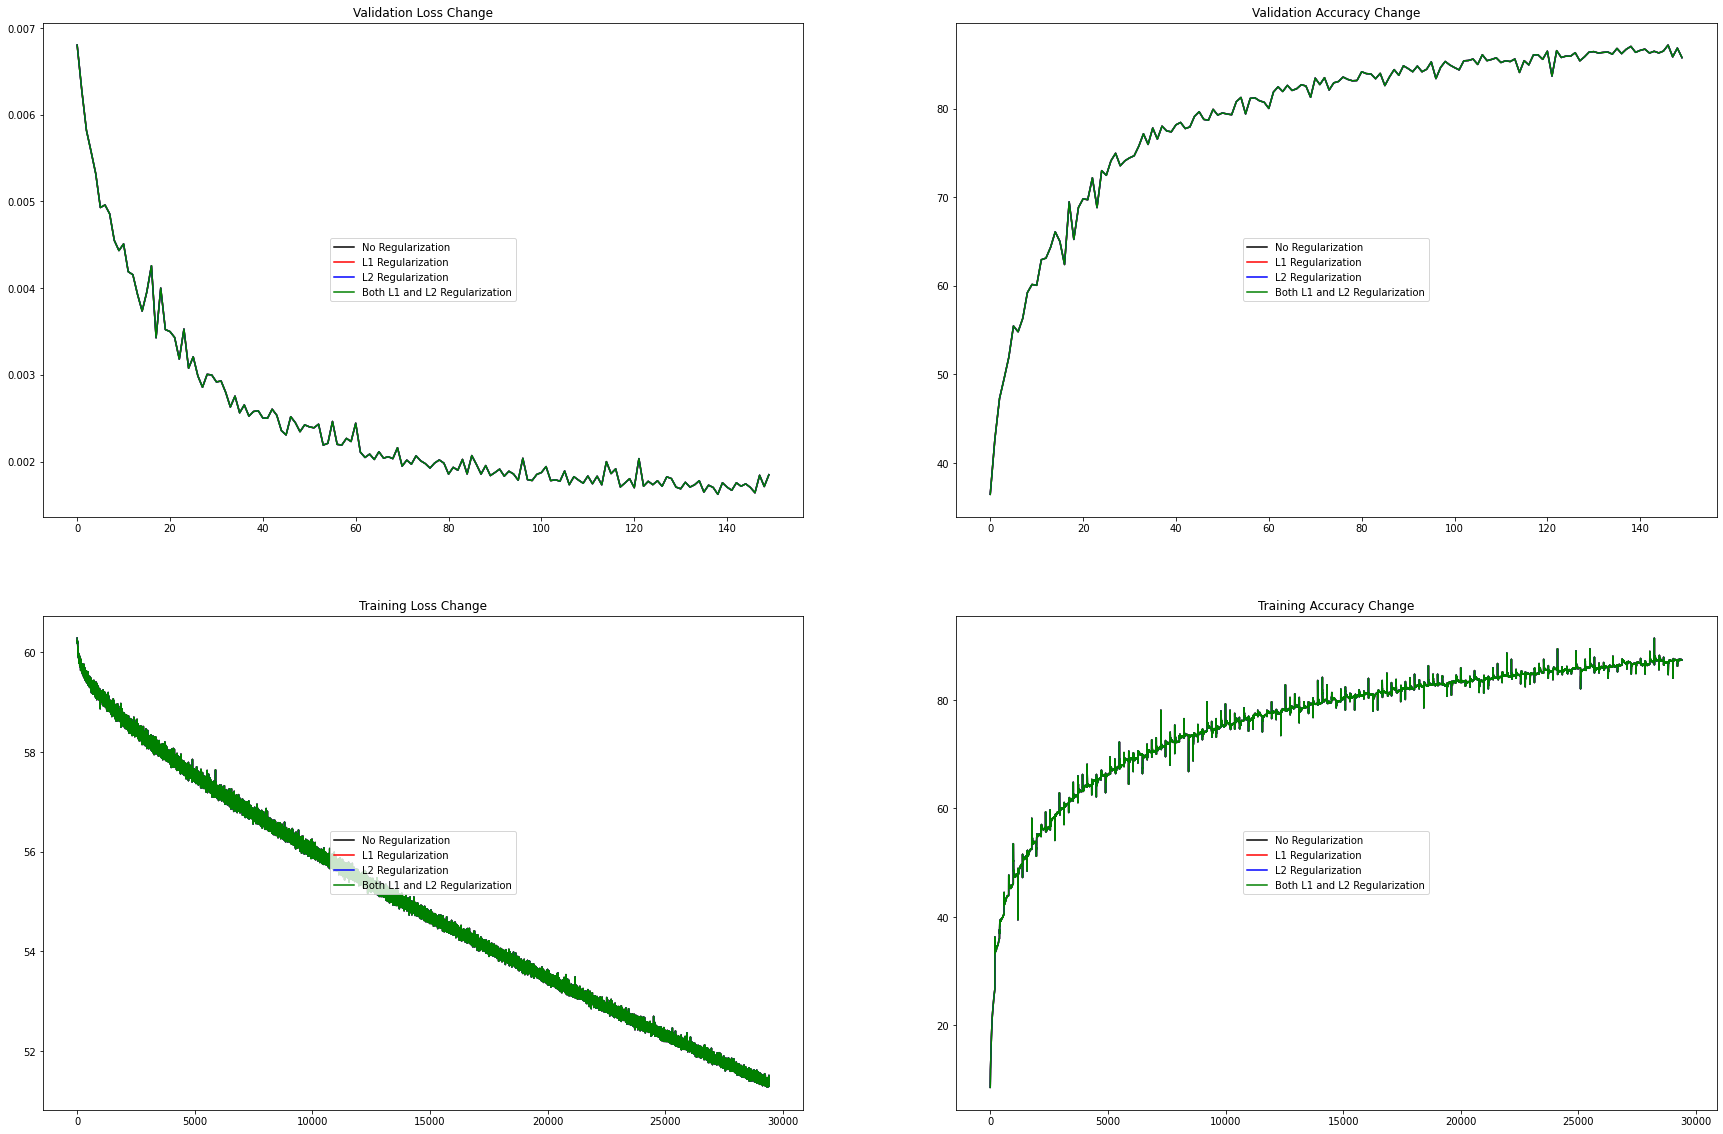

In [0]:
draw_accuracy_loss_change_graps(cifar_model,cifar_model,cifar_model,cifar_model)

GRADCAM VISUALIZATION

size torch.Size([1, 3, 288, 432]) pil shape (288, 432, 3)
size torch.Size([1, 3, 224, 224]) pil shape (288, 432, 3)
saliency_map size : torch.Size([7, 7])
saliency_map size : torch.Size([7, 7])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


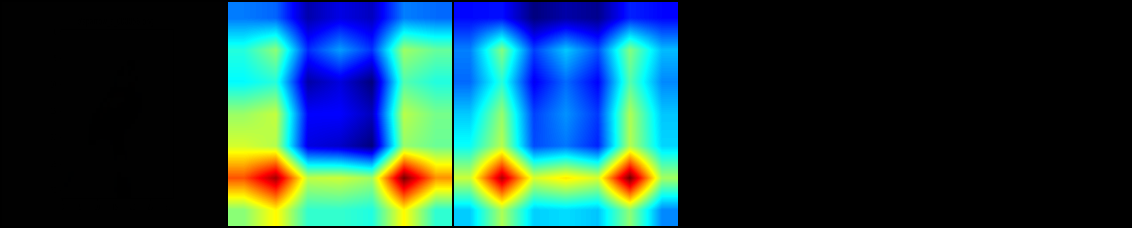

In [0]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import torchvision.models as models
from torchvision.utils import make_grid, save_image
import importlib

import gradcam.gradcam_utils as gradcam_utils
from gradcam.gradcam_utils import visualize_cam, Normalize2
from gradcam.gradcam import GradCAM, GradCAMpp

importlib.reload(gradcam_utils)
#importlib.reload(gradcam.gradcam)


img_dir = '/content/gdrive/My Drive/eva-04/S9/images'
img_name = 'sparrow_s_000056.png'
img_path = os.path.join(img_dir, img_name)
pil_img = PIL.Image.open(img_path)
pil_img

pil_img1 = pil_img.convert("RGB")
pil_img1 = np.asarray(pil_img1, dtype=np.float32) / 255
pil_img1 = pil_img1[:, :, :3]

resnet = torchvision.models.resnet18(pretrained=True)

resnet.eval(), resnet.cuda();
cam_dict = dict()
resnet_model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(224, 224)) 
normalizer = gradcam_utils.Normalize2(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(pil_img1)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
print('size',torch_img.shape,'pil shape',np.array(pil_img1).shape)
#torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(224, 224), mode='bilinear', align_corners=False)

print('size',torch_img.shape,'pil shape',np.array(pil_img1).shape)

normed_torch_img = normalizer(torch_img)
#model_dict = cifar_model.m_model.state_dict()
resnet_gradcam = GradCAM(resnet_model_dict, True)
resnet_gradcampp = GradCAMpp(resnet_model_dict, True)
cam_dict['resnet'] = [resnet_gradcam, resnet_gradcampp]

images = []
for gradcam, gradcam_pp in cam_dict.values():
    mask, _ = gradcam(normed_torch_img)
    heatmap, result = visualize_cam(mask.cpu(), torch_img.cpu())

    mask_pp, _ = gradcam_pp(normed_torch_img)
    heatmap_pp, result_pp = gradcam_utils.visualize_cam(mask_pp.cpu(), torch_img.cpu())
    
    images.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
    
images = make_grid(torch.cat(images, 0), nrow=5)

output_dir = '/content/gdrive/My Drive/eva-04/S9/images/gradcam'
os.makedirs(output_dir, exist_ok=True)
output_name = img_name
output_path = os.path.join(output_dir, output_name)
PIL.Image.open(img_path)

save_image(images, output_path)

PIL.Image.open(output_path)




PRINT MODAL STATE DICT

In [0]:
for param_tensor in cifar_model.m_model.state_dict():
    print(param_tensor, "\t", cifar_model.m_model.state_dict()[param_tensor].size())

conv1.weight 	 torch.Size([64, 3, 3, 3])
bn1.weight 	 torch.Size([64])
bn1.bias 	 torch.Size([64])
bn1.running_mean 	 torch.Size([64])
bn1.running_var 	 torch.Size([64])
bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv1.weight 	 torch.Size([64, 64, 3, 3])
layer1.0.bn1.weight 	 torch.Size([64])
layer1.0.bn1.bias 	 torch.Size([64])
layer1.0.bn1.running_mean 	 torch.Size([64])
layer1.0.bn1.running_var 	 torch.Size([64])
layer1.0.bn1.num_batches_tracked 	 torch.Size([])
layer1.0.conv2.weight 	 torch.Size([64, 64, 3, 3])
layer1.0.bn2.weight 	 torch.Size([64])
layer1.0.bn2.bias 	 torch.Size([64])
layer1.0.bn2.running_mean 	 torch.Size([64])
layer1.0.bn2.running_var 	 torch.Size([64])
layer1.0.bn2.num_batches_tracked 	 torch.Size([])
layer1.1.conv1.weight 	 torch.Size([64, 64, 3, 3])
layer1.1.bn1.weight 	 torch.Size([64])
layer1.1.bn1.bias 	 torch.Size([64])
layer1.1.bn1.running_mean 	 torch.Size([64])
layer1.1.bn1.running_var 	 torch.Size([64])
layer1.1.bn1.num_batches_tracked 	 torch.

OPTIMIZER STATE DICT

In [0]:
for var_name in cifar_model.m_optimizer.state_dict():
    print(var_name, "\t", cifar_model.m_optimizer.state_dict()[var_name])

state 	 {140012712964168: {'momentum_buffer': tensor([[[[ 5.7262e-02,  3.9019e-02, -8.5817e-03],
          [ 7.6983e-02,  3.7400e-02, -1.9687e-03],
          [ 1.0333e-01,  1.2453e-01,  8.8726e-02]],

         [[-9.5121e-05, -8.6054e-03, -4.6945e-02],
          [ 3.2648e-02, -1.7021e-03, -2.9392e-02],
          [ 5.8927e-02,  8.1581e-02,  5.5897e-02]],

         [[ 4.5504e-02,  2.1569e-02, -2.1054e-02],
          [ 6.8998e-02,  2.0853e-02, -1.0342e-02],
          [ 8.4306e-02,  9.1999e-02,  6.1293e-02]]],


        [[[-4.3024e-02, -1.2912e-01, -1.7742e-01],
          [-5.7224e-03, -7.1818e-02, -1.0681e-01],
          [ 6.9804e-03, -5.9666e-02, -9.5150e-02]],

         [[-7.5858e-02, -1.6122e-01, -2.0150e-01],
          [-4.4146e-02, -1.0606e-01, -1.3173e-01],
          [-3.3095e-02, -9.2231e-02, -1.2214e-01]],

         [[-5.9760e-02, -1.4226e-01, -1.8205e-01],
          [-2.6412e-02, -8.4385e-02, -1.1003e-01],
          [-2.1240e-02, -6.6071e-02, -9.0027e-02]]],


        [[[ 2.2593e-